# WHOMP Test on NPI Data Set

In [1]:
cd /Users/shizhouxu/Desktop/SX_Workspace/WHOMP

/Users/shizhouxu/Desktop/SX_Workspace/WHOMP


/Users/shizhouxu/Desktop/SX_Workspace/diverse_subgroup_env/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from WHOMP import KMeansConstrained, WHOMP_Matching, WHOMP_Random, RandomPartition, Pocock_Simon_minimization
from WHOMP_Test import logistic_regression_Gaussian_mixture_experiment, SVM_Gaussian_mixture_experiment, LinearRegression_Gaussian_mixture_experiment, Wasserstein_Gaussian_experiment, plot_kmeans_constrained, plot_whomp_random, plot_whomp_matching, plot_pocock_simon
from WHOMP_Test import NPI_experiment

## Load Data

In [3]:
df = pd.read_csv('/Users/shizhouxu/Desktop/SX_Workspace/Diverse_Subgroups/NPI/NPI_dataset/data.csv')
df

,score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,elapse,gender,age
0,18,2,2,2,2,1,2,1,2,2,...,1,1,2,2,2,1,2,211,1,50
1,6,2,2,2,1,2,2,1,2,1,...,2,1,2,2,2,2,1,149,1,40
2,27,1,2,2,1,2,1,2,1,2,...,1,2,1,1,2,1,2,168,1,28
3,29,1,1,2,2,2,1,2,1,1,...,1,2,1,2,2,1,1,230,1,37
4,6,1,2,1,1,1,2,1,2,1,...,2,1,2,2,2,0,1,389,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11238,1,2,2,2,1,1,2,1,2,1,...,2,1,2,2,2,2,1,243,1,24
11239,10,2,2,1,1,1,2,1,1,1,...,2,1,2,1,2,2,1,197,1,39
11240,6,1,2,2,1,1,2,1,2,1,...,2,1,2,2,2,2,1,447,2,33
11241,12,2,2,1,1,1,1,1,1,1,...,1,2,2,2,2,2,1,167,1,24


In [4]:
X = df.to_numpy()[:,1:41]
Gender = df['gender'].to_numpy()
Score = df['score'].to_numpy()
Gender = Gender[~np.any(X == 0, axis=1)]
Score = Score[~np.any(X == 0, axis=1)]
X = X[~np.any(X == 0, axis=1)]

## Wasserstein Experiment

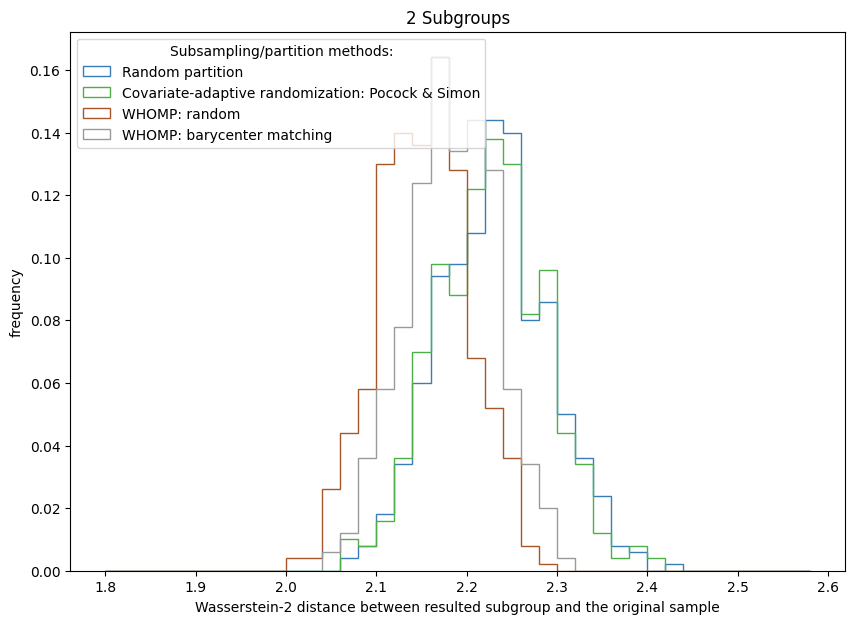

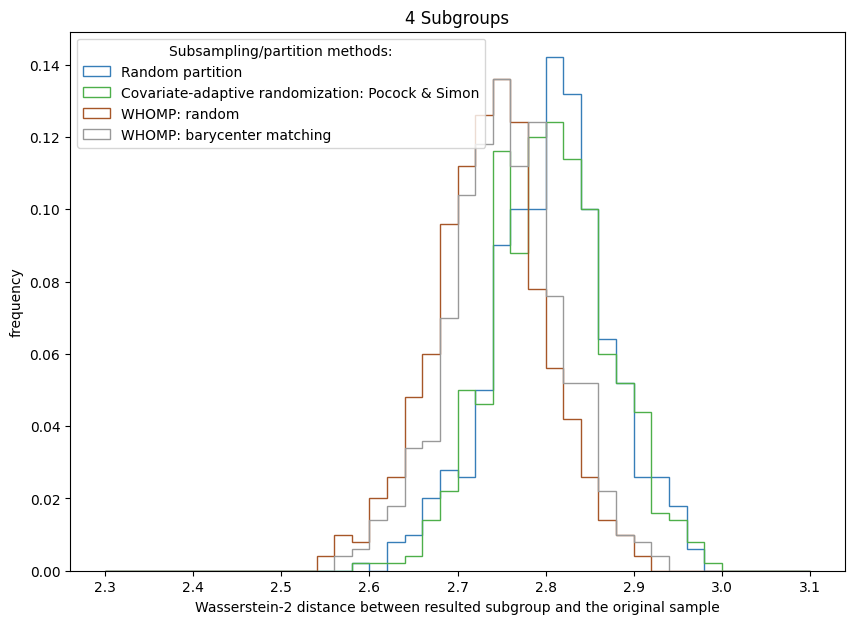

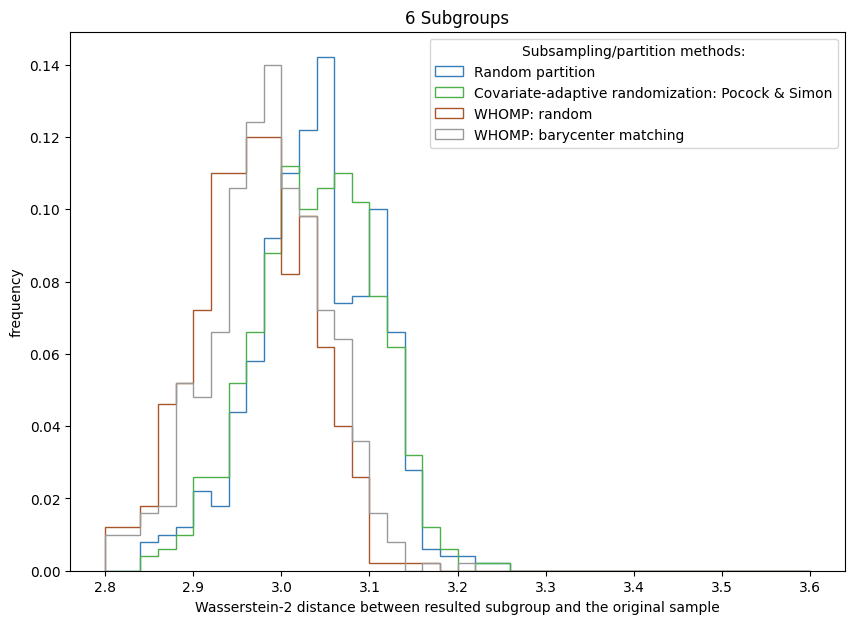

Average Errors: [2.230026549910941, 2.806043271712684, 3.039062987489743] [2.226876760160902, 2.805602549840501, 3.039655592817715] [2.1523588791809543, 2.7364026102313765, 2.9677733414077427] [2.1831813153430364, 2.753644501254848, 2.984188447746776]
Standard Deviations: [0.060676080067063785, 0.06611472813203924, 0.06730149629282302] [0.060441942296870235, 0.06540386580173232, 0.0667040673987662] [0.050178898728163154, 0.0639068701490055, 0.0664935638202455] [0.049859913795707166, 0.06357641629519008, 0.06580592257386053]
Variances (bary_var_list[0]): 2.9180578837528794e-07 1.6463371679735864e-07 2.2853726262297465e-07 2.4520731573640013e-07
Variances (bary_var_list[1]): 7.923394868344914e-07 4.738636650752336e-07 6.123452007542454e-07 7.548746239178243e-07
Variances (bary_var_list[2]): 1.1378380868749906e-06 6.926390918576339e-07 1.0910472934722147e-06 1.002656463124992e-06
Mean Variances (bary_mean_list[0]): 0.0002137214104166667 0.000137303354861111 0.00017226307708333326 0.000175

In [5]:
if __name__ == "__main__":

    # Run the partition experiment
    random_error_ave, PS_error_ave, anticluster_error_ave, WHOMP_error_ave, \
    random_error_std, PS_error_std, anticluster_error_std, WHOMP_error_std, \
    random_var_list, PS_var_list, anti_var_list, bary_var_list, \
    random_mean_list, PS_mean_list, anti_mean_list, bary_mean_list = NPI_experiment(X, range(2, 7, 2), 500)

    # Print average and standard deviations of errors
    print("Average Errors:", random_error_ave, PS_error_ave, anticluster_error_ave, WHOMP_error_ave)
    print("Standard Deviations:", random_error_std, PS_error_std, anticluster_error_std, WHOMP_error_std)

    # Print variance of partition results
    for i in range(3):
        print(f"Variances (bary_var_list[{i}]):", np.var(np.array(bary_var_list[i])),
              np.var(np.array(anti_var_list[i])), np.var(np.array(PS_var_list[i])), np.var(np.array(random_var_list[i])))

    for i in range(3):
        print(f"Mean Variances (bary_mean_list[{i}]):", np.var(np.array(bary_mean_list[i])),
              np.var(np.array(anti_mean_list[i])), np.var(np.array(PS_mean_list[i])), np.var(np.array(random_mean_list[i])))